In [1]:
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl
import cv2
import scipy.ndimage as nd
import matplotlib.pyplot as plt
#from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature
from skimage import filters as skfl
from skimage.color import rgb2gray
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def showme(image, ax=None, cmap=None):
    if ax is None:
        ax = pl.figure(figsize=(10,10)).add_subplot(111)

    if cmap is None:
        ax.imshow(image)
    else:
        ax.imshow(image, cmap=cmap)
    ax.axis('off')
    

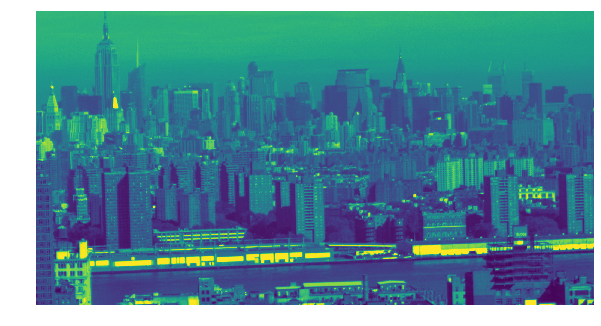

In [4]:
rawimg = np.fromfile("img1.raw", np.uint8)
rawimg = rawimg.reshape([2160,4096,3])
imgsq = rawimg.astype(float)
imgsq *= 255 / imgsq.max()
img2d = (imgsq.reshape([2160,4096,3]).sum(2) / 3.)
img2d /= img2d.max()
img2d = img2d.astype(float)
showme(img2d)

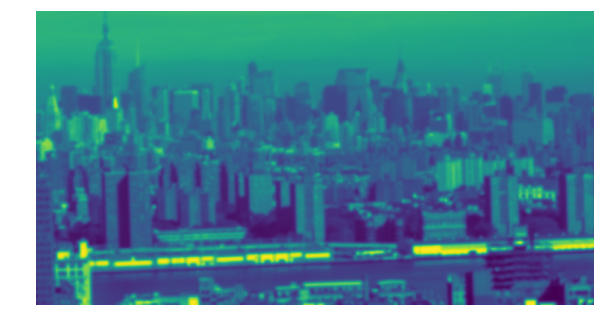

In [5]:
smoothImg = nd.filters.gaussian_filter(img2d, [10, 10])
showme(smoothImg)
#showme((img2d - smoothImg)**2)
pl.savefig("smoothedDiff.png")

(array([ 364.,  205.,  196.,  111.,   68.,   31.,    8.,    7.,    1.,    1.]),
 array([ 0.15000879,  0.1601418 ,  0.1702748 ,  0.18040781,  0.19054082,
         0.20067383,  0.21080683,  0.22093984,  0.23107285,  0.24120586,
         0.25133887]),
 <a list of 10 Patch objects>)

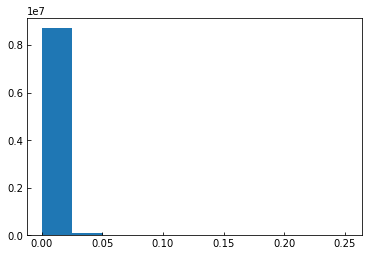

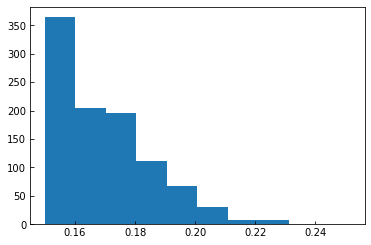

In [6]:

smoffsq = (img2d - smoothImg)**2
pl.hist(smoffsq.flatten())
np.where(smoffsq == smoffsq.max())
pl.figure()
pl.hist(smoffsq[smoffsq > 0.15].flatten())


In [7]:
#showme(img2d[1639:1839, 822:1022])
#showme(smoothImg[1639:1839, 822:1022])
#showme((img2d[1639:1839, 822:1022] - smoothImg[1639:1839, 822:1022])**2)
#pl.savefig("smoothedDiff.png")

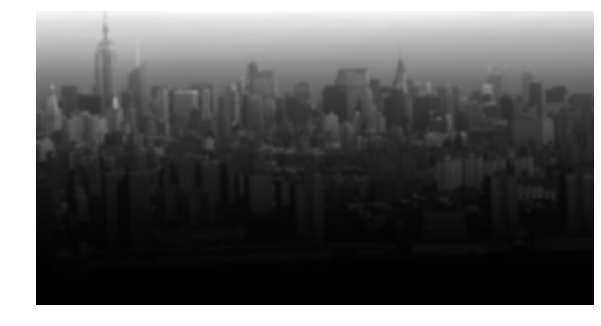

In [8]:
#skfl.sobel?
smoothImgEn = smoothImg[:,:] * (np.atleast_2d(np.linspace(1, 0, smoothImg.shape[0])).T)**2
#imgedge = skfl.sobel(smoothImgEn)
showme(smoothImgEn, cmap = 'gray')
#showme(imgedge, cmap = 'gray')

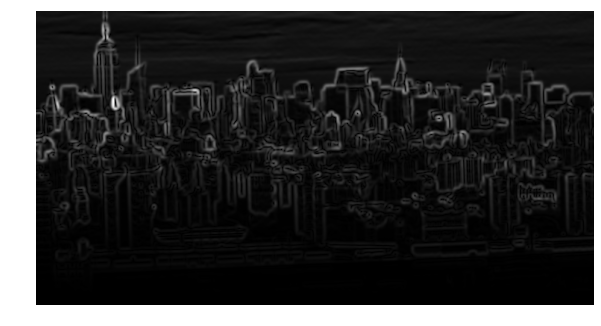

In [9]:
imgedge = skfl.sobel(smoothImgEn)
showme(imgedge, cmap = 'gray')

In [28]:
ymax = imgedge.max(0)
#ymax.shape
imgedge.shape[1]
envelope = [np.where(imgedge[:,i] == ymax[i])[0][-1] for i in range(imgedge.shape[1])][1:]

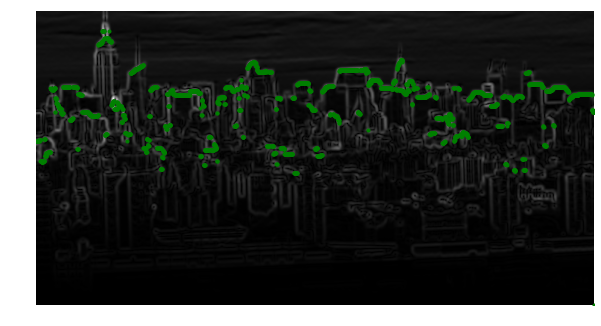

In [32]:
showme(imgedge, cmap = 'gray')
pl.plot(np.arange(imgedge.shape[1])[1:], envelope, 'g.')

0.460130718954 0.611973856209 0.308287581699


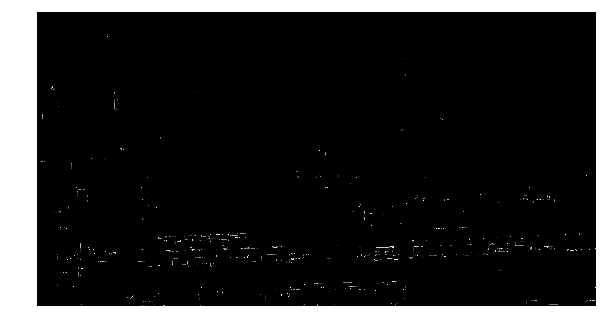

In [56]:
v = np.median(img2d)
sigma = 0.33
lower = float(max(0, (1.0 - sigma) * v))
upper = float(min(255, (1.0 + sigma) * v))
img2dbw = rgb2gray(img2d)
edges1 = feature.canny(img2d, sigma=sigma, low_threshold=lower, high_threshold=upper)
showme(edges1, cmap = 'gray')
print (v, upper, lower)

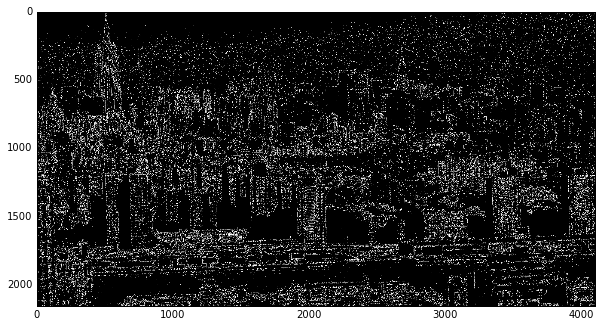

In [60]:

edges2 = cv2.Canny(rawimg, 60, 50)#, apertureSize = 5)#, L2gradient = True)
pl.figure(figsize = (10, 10))
pl.imshow(edges2, cmap = 'gray')

In [61]:
def auto_canny(image, sigma = 0.9):
    v = np.median(image)

    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    return edged




In [65]:
gray = cv2.cvtColor(rawimg, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

cv2.imshow('Original', rawimg)
cv2.imshow('Edges', np.hstack([wide, tight, auto]))


error: /Users/travis/build/skvark/opencv-python/opencv/modules/highgui/src/window.cpp:583: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


In [ ]:
showme(auto)

In [33]:
upper

152